In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 4
D = 2


In [3]:
X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])

In [4]:
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [5]:
T = np.array([0,1,1,0])


In [6]:
print(T)

[0 1 1 0]


In [7]:
ones = np.ones((N,1))

In [8]:
ones

array([[1.],
       [1.],
       [1.],
       [1.]])

In [12]:
xy = (X[:,0]*X[:,1]).reshape(-1,1)

In [14]:
X[:,0]*X[:,1]

array([0, 0, 0, 1])

In [15]:
xy

array([[0],
       [0],
       [0],
       [1]])

In [16]:
Xb = np.concatenate((ones,xy,X),axis = 1)

In [17]:
Xb

array([[1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 1., 1., 1.]])

In [18]:
w = np.random.randn(D+2)

In [19]:
w

array([-0.37108832,  0.42167209, -1.10425118,  0.39457142])

In [20]:
Z = np.dot(Xb,w)

In [21]:
Z

array([-0.37108832,  0.0234831 , -1.4753395 , -0.65909599])

In [23]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [25]:
Y = sigmoid(Z)

In [26]:
Y

array([0.40827807, 0.50587051, 0.18613239, 0.34094271])

In [27]:
def cross_entropy(T,Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E = E - np.log(Y[i])
        else:
            E = E - np.log(1-Y[i])
    return E        

In [30]:
cross_entropy(T,Y)

3.3044349168007003

In [31]:
def cross_entropy1(T,Y):
    return -(T*np.log(Y)+(1-T)*np.log(1-Y)).sum()

In [32]:
cross_entropy1(T,Y)

3.3044349168007003

In [33]:
learning_rate = 0.001
error = []

In [35]:
for i in range(10000):
    e = cross_entropy(T,Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)
     #gradient descent weight update with regularization   
    w = w + learning_rate*(Xb.T.dot(T-Y) - 0.01*w)
    
    #Recalculating Y
    Y = sigmoid(Xb.dot(w))    

1.74496532370511
1.6776753684537102
1.6154435745866293
1.557723465196425
1.5040657509507007
1.4540903041462467
1.4074685302893122
1.363911932051085
1.3231644073239417
1.2849968370052665


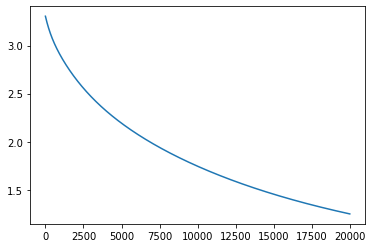

In [36]:
plt.plot(error)
plt.title("cross_entropy per iteration")
plt.show()

In [38]:
print("Final weights",w)

Final weights [-0.4895094  -4.23566737  1.56115228  1.57586833]


In [43]:
print("classification rate:",1-np.abs(T-np.round(Y)).sum()/N)

classification rate: 1.0
